# Fetch Academix data

In [1]:
"""The goal of this NB is to fetch the enriched data that academix has about the researchers
"""

'The goal of this NB is to fetch the enriched data that academix has about the researchers\n'

In [1]:
import pandas as pd
import numpy as np
from elasticsearch import Elasticsearch
import requests
import json
%pylab inline
plt.style.use("bmh")
np.random.seed(983456)

Populating the interactive namespace from numpy and matplotlib


In [17]:
#fetch pmids
pmids_to_fetch=['18495766', '16574185']
pmids_to_fetch = list(dict.fromkeys(pmids_to_fetch))
pmids_to_fetch

['18495766', '16574185']

In [18]:
es = Elasticsearch([{'host': '35.178.209.118', 'use_ssl': False}]) 

In [63]:
def fetch_res_detail(pmid,es,index):
    include=["pmid", "doi","last_author_id","last_author_name","last_author.affiliation","last_author_email","title","pub_year","last_author_country","last_author_inst",\
    "journal_name","language",]
    es_query={"query":{"terms":{"pmid": pmid }},"_source":{"includes":include},"size":10000} 
    res=es.search(index=index,
                 body=es_query)
    #print(es_query)
    #print(res)
    return pd.DataFrame([h["_source"] for h in res["hits"]["hits"]])


In [64]:
res_df=fetch_res_detail(pmids_to_fetch,es,"bulk_papers5")

In [65]:
res_df

,pub_year,last_author_inst,journal_name,language,pmid,title,last_author_country,last_author_name,doi
0,2008,Washington University Medical Center,Journal of virology,eng,18495766,Investigation of putative multisubtype hepatit...,United States,"Gretch, DR",NaN
1,2006,University of Washington,Virology,eng,16574185,Identification of a specific gene expression p...,United States,"Katze, MG",10.1016/j.virol.2006.02.030


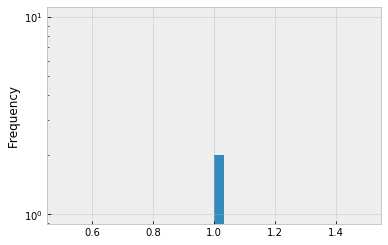

In [53]:
res_df.groupby("last_author_name").pmid.count().plot.hist(logy=True, bins=30) 